<a href="https://colab.research.google.com/github/RichardMWarburton/JOGLE/blob/main/JOGLE_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOGLE Analysis

Analysis of GPX files generated during a John O'Groats to Land's End cycle ride

## Section 0: Workbook Set Up

In [8]:
#Install packages not in CoLab environment
!pip install gpxpy

In [18]:
#Immport packages for the analysis
import gpxpy
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Import Data

In [10]:
#Download JOGLE git repository if main.zip is not found
if not os.path.exists('GPX_data.zip'):
  !wget --no-check-certificate https://github.com/RichardMWarburton/JOGLE/raw/main/GPX_data.zip
  !unzip -q GPX_data.zip

In [11]:
# List GPX files in data
gpx_files = os.listdir('GPX_data/')

In [12]:
#Initate Data Frame for storing
gpx_dict = {'lon':[], 'lat':[], 'alt':[], 'time':[]}

#UI progress output
print('Processing started...')

#for each gpx file, load the data and add to overall file
for fl in gpx_files:

  gpx_file = open('GPX_data/' + fl, 'r')
  gpx = gpxpy.parse(gpx_file)
  
  data = gpx.tracks[0].segments[0].points

  for point in data:
    gpx_dict['lon'].append(point.longitude)
    gpx_dict['lat'].append(point.latitude)
    gpx_dict['alt'].append(point.elevation)
    gpx_dict['time'].append(point.time)

#UI progress output
print('Processing complete')

Processing started...
Processing complete


## Section 2: Summary Analysis

In [45]:
#Define numpy arrays of lon, lat and altitude
lon = np.array(gpx_dict['lon'])
lat = np.array(gpx_dict['lat'])
alt = np.array(gpx_dict['alt'])
time = np.array(gpx_dict['time'])

#Identify maximum altitude
max_idx = np.argmax(alt) 
max_lon = lon[max_idx]
max_lat = lat[max_idx]

#Identify lowest altituude
min_idx = np.argmin(alt) 
min_lon = lon[min_idx]
min_lat = lat[min_idx]

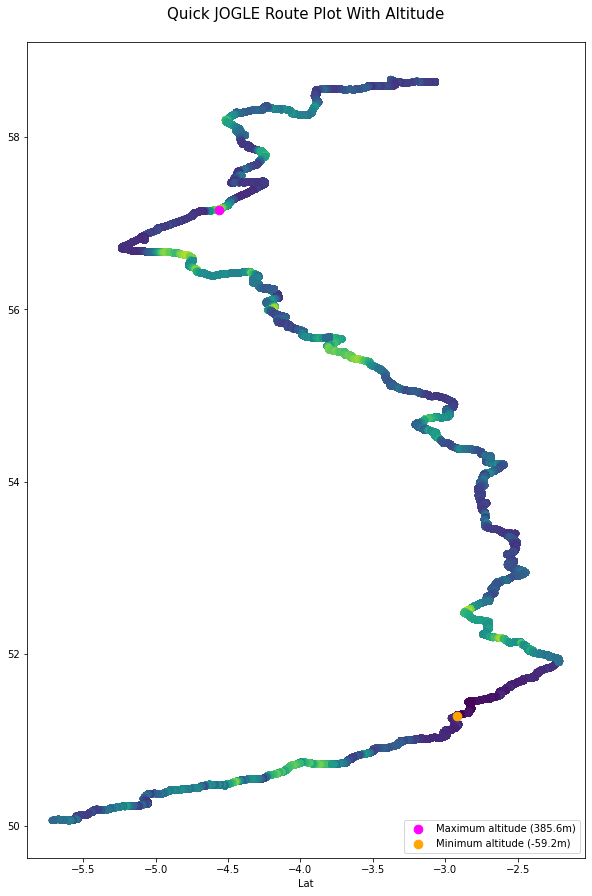

In [43]:
#Provisional Plot of route with altitude
plt.figure(figsize = (10,15))
plt.scatter(gpx_dict['lon'],gpx_dict['lat'], c = gpx_dict['alt'])
plt.scatter(max_lon,max_lat, color = 'magenta', label ='Maximum altitude ({:.1f}m)'.format(alt[max_idx]),s = 75)
plt.scatter(min_lon,min_lat, color = 'orange', label ='Minimum altitude ({:.1f}m)'.format(alt[min_idx]),s = 75)
plt.title('Quick JOGLE Route Plot With Altitude\n', size = 15)
plt.xlabel('Lon')
plt.xlabel('Lat')
plt.legend(loc = 'lower right')
plt.show()